## Import Statements

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import Counter

In [106]:
#df = pd.read_csv('Combined_Social_Data.csv')
df = pd.read_pickle('Combined_Social_Data_Pickle.pkl')

In [107]:
df.shape

(927351, 47)

In [108]:
df['created'] = pd.to_datetime(df['created'])

In [109]:
df['social_platform'].unique()

array(['Facebook', 'Instagram', 'Twitter', 'Youtube'], dtype=object)

In [110]:
df.head(3).T

,0,1,2
Facebook,1,1,1
Instagram,0,0,0
Twitter,0,0,0
Youtube,0,0,0
age,26,26,26
artist_name_x,21Savage,21Savage,21Savage
artist_name_y,21 Savage,21 Savage,21 Savage
count_of_followers,NaN,NaN,NaN
created,2015-05-18 19:24:23,2015-05-25 16:00:00,2015-05-25 22:26:12
created_12am-6am,0,0,0


In [111]:
top_5 = ['Justin Timberlake', 'Maluma', 'Pink', 'Avril Lavigne', 'Willie Nelson']
df = df[df['artist_name_y'].isin (top_5)]

In [112]:
print(df.shape)
Counter(df['artist_name_y'])

(28491, 47)


Counter({'Maluma': 15252,
         'Willie Nelson': 4502,
         'Avril Lavigne': 2526,
         'Justin Timberlake': 2856,
         'Pink': 3355})

In [113]:
df_mb = pd.read_csv('musicbrainz_data.csv')

In [114]:
df_mb['release_date'] = pd.to_datetime(df_mb['release_date'])

In [115]:
df_mb.head(2)

,Unnamed: 0,artist_name,title,release_date,primary_type
0,0,21 Savage,Savage,1982-01-01,Album
1,1,21 Savage,Savage Mode,2016-07-15,Album


##### Data Clean

In [116]:
#Drop all social engagement score = NAN
#df.dropna(subset=['normalized_social_engagement_score'], inplace=True)

In [117]:
df.shape

(28491, 47)

In [118]:
#Average social_engagement scores by channel
social_channels = ['Facebook', 'Instagram', 'Twitter', 'Youtube']
for social in social_channels:
    print(social, " average score is: ", df[df[social] == 1]['normalized_social_engagement_score'].mean())

Facebook  average score is:  0.15525791848878648
Instagram  average score is:  0.32558895299130164
Twitter  average score is:  -0.17231041694452473
Youtube  average score is:  nan


In [119]:
df_mb[df_mb['artist_name']=='Willie Nelson']

,Unnamed: 0,artist_name,title,release_date,primary_type
1695,1695,Willie Nelson,Christmas With Willie Nelson,1997-07-29,Album
1696,1696,Willie Nelson,Half Nelson,1985-01-01,Album
1697,1697,Willie Nelson,Here’s Willie Nelson,1963-01-01,Album
1698,1698,Willie Nelson,Nelson,2001-07-30,Single
1699,1699,Willie Nelson,The Essential Willie Nelson,1995-08-01,Album
1700,1700,Willie Nelson,Willie Nelson,1993-01-01,Album
1701,1701,Willie Nelson,Willie Nelson & Friends,2004-01-12,Album
1702,1702,Willie Nelson,Willie Nelson (live),1995-01-01,Album
1703,1703,Willie Nelson,Willie Nelson Collection,1988-01-01,Album
1704,1704,Willie Nelson,Willie Nelson Live,1998-01-01,Album


## First Artist (Justin Timberlake)

In [120]:
df_justin = df[df['artist_name_y'] == 'Justin Timberlake']

In [121]:
#adjust dataframe to be 2015 onwards
df_justin = df_justin[df_justin['created']>pd.to_datetime('2015-01-01 00:00:00')]

In [122]:
min(df_justin['created'])

Timestamp('2015-01-02 03:30:56')

In [123]:
df_mb_justin = df_mb[df_mb['artist_name'] == 'Justin Timberlake']

In [124]:
df_mb_justin.sort_values('release_date', inplace=True)

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


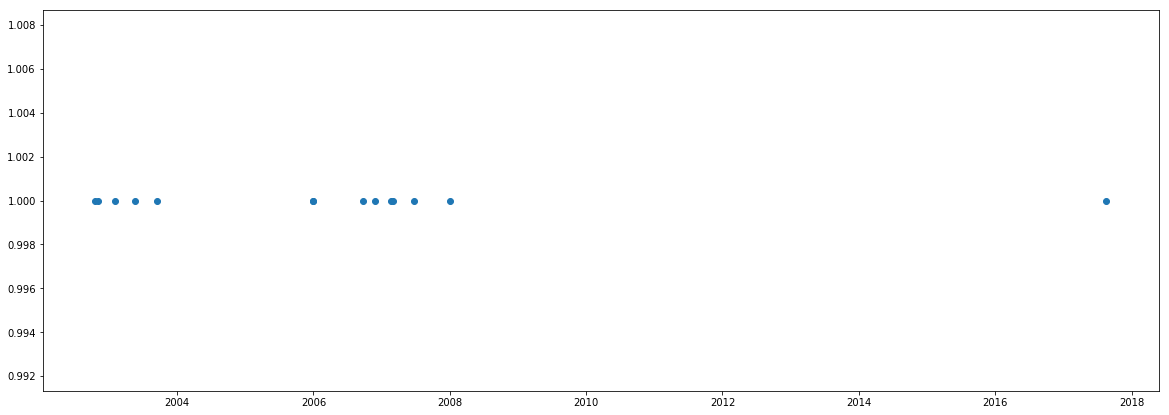

In [125]:
y = [1] * len(df_mb_justin['release_date'])
df_mb_justin['release_date']
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,1,1)
ax.scatter(df_mb_justin['release_date'],y)

In [126]:
#Only grab releases within timeframe of social media data
df_mb_justin = df_mb_justin[df_mb_justin['release_date']>min(df_justin['created'])]

In [127]:
df_mb_justin

,Unnamed: 0,artist_name,title,release_date,primary_type
834,834,Justin Timberlake,Lullaby Renditions of Justin Timberlake,2017-08-18,Album


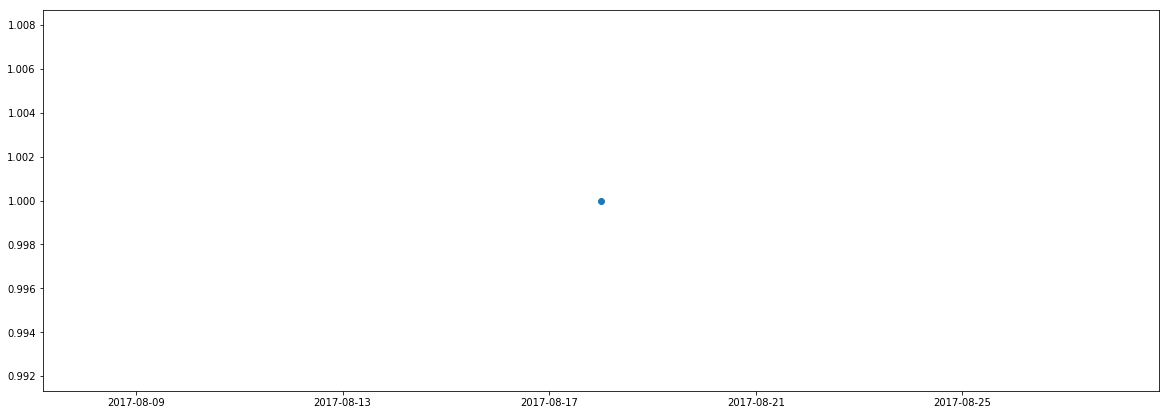

In [128]:
y = [1] * len(df_mb_justin['release_date'])
df_mb_justin['release_date']
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,1,1)
ax.scatter(df_mb_justin['release_date'],y)

In [129]:
#Average social_engagement scores by channel
social_channels = ['Facebook', 'Instagram', 'Twitter', 'Youtube']
for social in social_channels:
    print(social, " average score is: ", df_justin[df_justin[social] == 1]['normalized_social_engagement_score'].mean())

Facebook  average score is:  -0.18441309140210277
Instagram  average score is:  -0.17744140175267015
Twitter  average score is:  -0.2163351880579736
Youtube  average score is:  nan


In [130]:
#Removing Youtube due to outweight
#social_channels = ['Facebook', 'Instagram', 'Twitter']

In [131]:
#Note: the social engagement score and crowdtangle scores dont seem to have a lot in common
df_justin['crowdtangle_score'] = df_justin['crowdtangle_score'].convert_objects(convert_numeric=True)
df_justin['normalized_social_engagement_score'].corr(df_justin['crowdtangle_score'])

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


0.1721835646498269

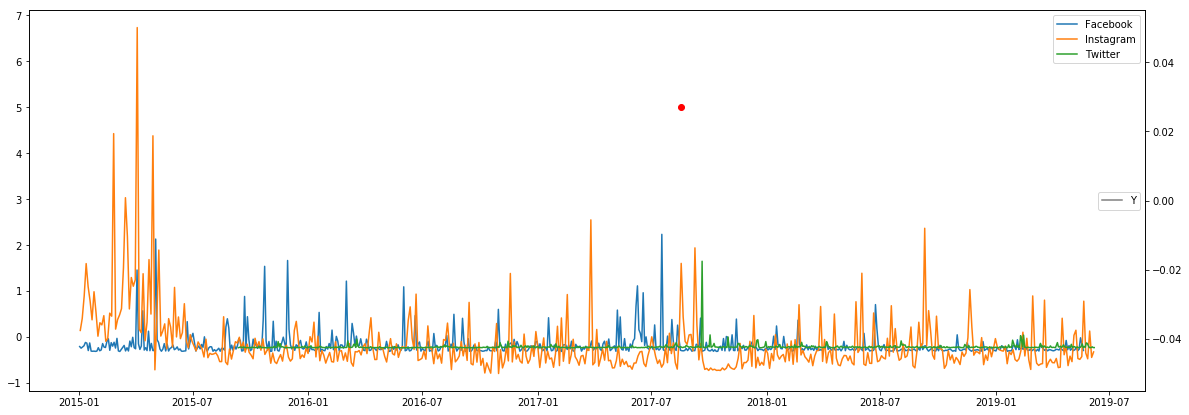

In [132]:
#Creates a date range for each social media platform and uses # of periods equal to # of posts for X axis.
#For y axis, only grabs the social engagement scores for that platform

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,1,1)
ax2 = ax.twinx()
#markers_on = [1,10, 50, 70]
for social in social_channels:
    daterange = pd.date_range(min(df_justin[df_justin[social]==1]['created']),
                                max(df_justin[df_justin[social]==1]['created']),
                                periods=len(df_justin[df_justin[social] == 1]['normalized_social_engagement_score']))
    if (social == 'Youtube'):
        ax2.plot(daterange,df_justin[df_justin[social] == 1]['normalized_social_engagement_score'],'C7')
    else:
        ax.plot(daterange,df_justin[df_justin[social] == 1]['normalized_social_engagement_score'])

ax.legend(social_channels[:3]) 
ax2.legend('Youtube',loc=5)   #Not sure why just a 'Y' is showing      

#-------------------------------------------------------------------------------
#Plotting the dots for release dates
#Not quite working correctly atm


y = [5] * len(df_mb_justin['release_date'])

#daterange2 = pd.date_range(min(df_justin['created']),
#                            max(df_justin['created']),
#                            periods=len(df_justin['social_engagement_score']))

ax.scatter(df_mb_justin['release_date'], y, c='red')

#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2)) #how to get to show months instead?
plt.show()


In [133]:
daterange.shape

(27,)

## NOTE: The MusicBrainz data looks to be incomplete, so replacing it for now with Ghazal's manually grabbed version from wikipedia

In [134]:
df_mb = pd.read_excel('Top5_Artist_Releases.xlsx')
df_mb['release_date'] = pd.to_datetime(df_mb['release_date'])

### Making a function so you can just input artist name + timeframe to get the above chart

In [142]:
def artist_social_chart(artist, start, finish = '2019-12-01 00:00:00'):
    '''
    User provides the name of an artist.  The primary social media dataframe is queried for all social media 
    posts by that artist based on the provided timeframe (start/finish).  Album/Track releases are also filtered
    for that time period. 
    
    A chart is plotted showing the social media engagement scores of facebook/instagram/twitter on the left axis
    and youtube on the right axis (due to scale).  Dots are placed on the chart for album/track release dates.
    
    Provide artist name in this format: 'Justin Timberlake' 
    
    Provide date in this format: '2015-01-01 00:00:00'
    
    '''
    
    #set up social media dataframe
    df_temp = df[df['artist_name_y'] == artist]
    df_temp = df_temp[(df_temp['created']>pd.to_datetime(start)) & (df_temp['created']<pd.to_datetime(finish))]
    
    #set up release date dataframe
    df_mb_temp = df_mb[df_mb['artist_name'] == artist]
    df_mb_temp.sort_values('release_date', inplace=True)
    
    #reduce timeframe on release date dataframe
    df_mb_temp = df_mb_temp[(df_mb_temp['release_date']>min(df_temp['created'])) & 
                           (df_mb_temp['release_date']<max(df_temp['created']))]
    
    social_channels = ['Facebook', 'Instagram', 'Twitter', 'Youtube']
    
    #Creates a date range for each social media platform and uses # of periods equal to # of posts for X axis.
    #For y axis, only grabs the social engagement scores for that platform

    fig = plt.figure(figsize=(20,7))
    ax = fig.add_subplot(1,1,1)
    ax2 = ax.twinx()
    #markers_on = [1,10, 50, 70]
    for social in social_channels:
        daterange = pd.date_range(min(df_temp[df_temp[social]==1]['created']),
                                    max(df_temp[df_temp[social]==1]['created']),
                                    periods=len(df_temp[df_temp[social] == 1]['normalized_social_engagement_score']))
        if (social == 'Youtube'):
            ax2.plot(daterange,df_temp[df_temp[social] == 1]['social_engagement_score'],'C7')
        else:
            ax.plot(daterange,df_temp[df_temp[social] == 1]['normalized_social_engagement_score'])


    
    ax.set_ylabel('Social Media Engagement Score: Facebook, Instagram, Twitter')
    ax2.set_ylabel('Social Media Engagement Score: Youtube')
    ax.set_xlabel('Time')

    #-------------------------------------------------------------------------------
    #Plotting the dots for release dates

    y = [5] * len(df_mb_temp['release_date'])

    #daterange2 = pd.date_range(min(df_justin['created']),
    #                            max(df_justin['created']),
    #                            periods=len(df_justin['social_engagement_score']))

    ax.scatter(df_mb_temp['release_date'], y, c='red')
    
    plt.title(artist + " Social Media Engagement Scores and Album/Track Release Dates")
    
    leg = social_channels[:3] + ['Album/Track Releases']
    ax.legend(leg, loc=1) 
    ax2.legend(['Youtube'],loc=5)

    #ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2)) #how to get to show months instead?
    plt.show()

In [50]:
def top_posts(artist, platform, start = '2016-01-01 00:00:00', finish = '2019-12-01 00:00:00'):
    '''
    Provides the top posts for a specific artist and platform
    
    Artist e.g. Justin Timberlake
    platform e.g. Facebook
    
    '''
    return df[(df['artist_name_y']==artist) & (df[platform]==1) &
              (df['created']>pd.to_datetime(start)) & (df['created']<pd.to_datetime(finish))
      ].sort_values('social_engagement_score',ascending=False)[
        ['created','description','social_engagement_score','crowdtangle_score','time_since_last_post',
        ]][:10]    
    

In [30]:
def posts_in_range(artist, start = , finish):
    '''
    Provides the posts for a specific artist within a certain time frame
    
    Artist e.g. Justin Timberlake
    Date in this format: '2015-01-01 00:00:00'
    '''
    
    return df[(df['artist_name_y']==artist) & (df['created']>pd.to_datetime(start))
              & (df['created']<pd.to_datetime(finish))
      ].sort_values('social_engagement_score',ascending=False)[
        ['created','description','social_engagement_score','crowdtangle_score','time_since_last_post',
        ]]     

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


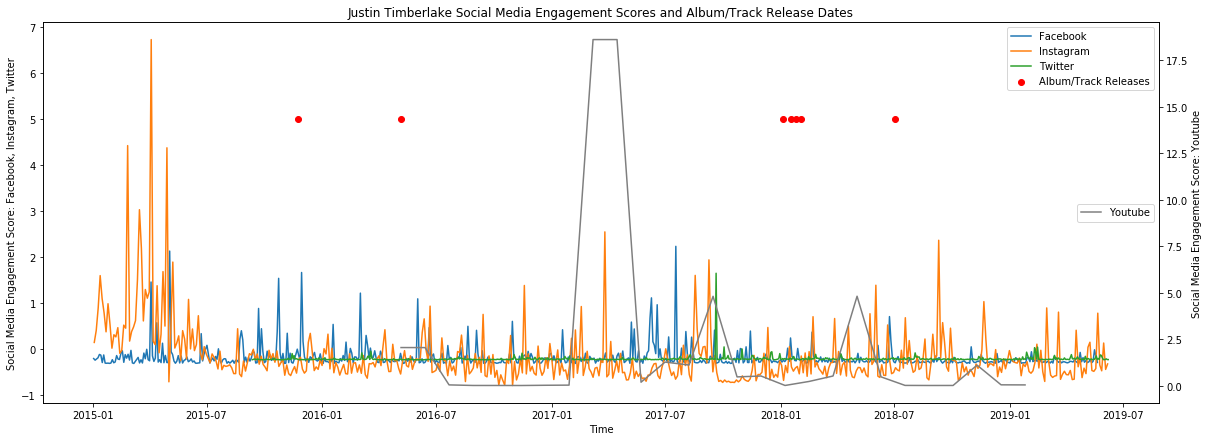

In [138]:
artist_social_chart('Justin Timberlake', '2015-01-01 00:00:00')

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


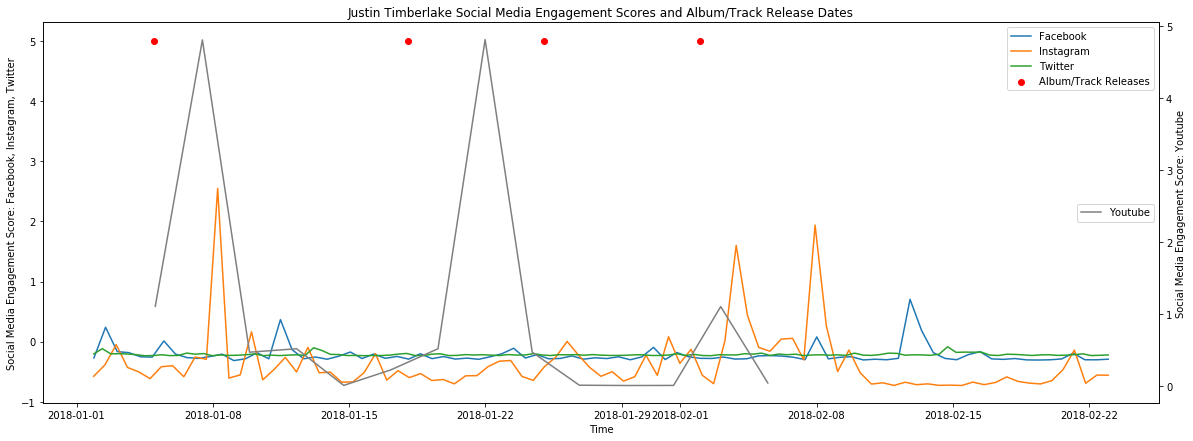

In [139]:
#Zoom in on a specific time frame
artist_social_chart('Justin Timberlake', '2018-01-01 00:00:00','2018-03-01 00:00:00')

In [48]:
pd.options.display.max_colwidth = 300
pd.options.display.max_rows = 300
posts_in_range('Justin Timberlake', '2018-01-01', '2018-03-01')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
982068,2018-01-25 14:22:33,Justin Timberlake - Say Something ft. Chris Stapleton (Official Video),38.539982,0,20 days 13:20:33.000000000
982074,2018-02-05 11:57:13,Justin Timberlake - Say Something ft. Chris Stapleton (Official Video),38.539982,0,0 days 00:00:08.000000000
982079,2018-02-05 11:58:02,Justin Timberlake - Filthy (Official Video),8.832434,0,0 days 00:00:10.000000000
982067,2018-01-05 01:02:00,Justin Timberlake - Filthy (Official Video),8.832434,0,468 days 06:20:51.000000000
982073,2018-02-05 11:57:05,Justin Timberlake - Man of the Woods (Official Video),4.140087,0,0 days 00:00:10.000000000
982070,2018-02-02 01:14:36,Justin Timberlake - Man of the Woods (Official Video),4.140087,0,7 days 10:51:14.000000000
982069,2018-01-25 14:23:22,Justin Timberlake - Supplies (Official Video),3.758329,0,0 days 00:00:49.000000000
982075,2018-02-05 11:57:22,Justin Timberlake - Supplies (Official Video),3.758329,0,0 days 00:00:09.000000000
982072,2018-02-05 11:56:55,Justin Timberlake - Pepsi Super Bowl LII Halftime Show,1.786878,0,0 days 00:00:08.000000000
982080,2018-02-05 11:58:26,Justin Timberlake - INTRODUCING MAN OF THE WOODS (Teaser),0.329473,0,0 days 00:00:24.000000000


In [53]:
top_posts('Justin Timberlake', 'Facebook', '2018-01-01 00:00:00','2018-03-01 00:00:00')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
207246,2018-02-05 00:53:00,⚠️Two minute warning. ⚠️ Jordan #SBLII,0.009499,22.73,0 days 04:15:07.000000000
207192,2018-01-07 23:15:00,When you roll in with a 2-time nominee... #GoldenGlobes Jessica Biel #Filthy,0.006350,16.81,0 days 01:13:33.000000000
207177,2018-01-02 15:18:00,FRIDAY... http://tmbr.lk/site,0.005166,13.68,0 days 17:56:44.000000000
207247,2018-02-05 01:53:00,#SBLII #PepsiHalftime Pepsi NFL #MOTW,0.004632,11.08,0 days 01:00:01.000000000
207238,2018-02-02 19:09:00,"Just made a #targetrun and got my limited edition vinyl there, also left a gift for 5 of y’all at the Super Target in St. Paul, Minnesota (1300 University Ave W, St Paul). Find the Target manager and just give her the code word ‘aardvark’. #TargetRun #ManoftheWoods #PJMasks #ETtheMovie",0.003668,9.71,0 days 03:23:22.000000000
207182,2018-01-05 05:08:00,This song should be played very loud. tmbr.lk/jFILTHY https://www.youtube.com/watch?v=gA-NDZb29I4&feature=youtu.be,0.003047,4.61,0 days 09:02:43.000000000
207224,2018-01-31 21:25:00,I feel like DJ Khaled right now!!! NEW SONG ALERT! Birthday vibes! Thanks everybody for the bday love!,0.002052,5.43,0 days 19:27:14.000000000
207212,2018-01-25 17:03:00,"Here we go! ""Say Something"" feat. Chris Stapleton. 🎥 La Blogothèque Art Perez",0.001911,2.89,0 days 21:43:37.000000000
207193,2018-01-08 13:05:00,The Man of the Woods Tour. #MOTWTour http://tmbr.lk/site,0.001684,4.46,0 days 13:50:27.000000000
207178,2018-01-02 20:06:00,📷 #ryanmcginleystudios http://tmbr.lk/site,0.001392,3.33,0 days 04:47:25.000000000


In [258]:
top_posts('Justin Timberlake', 'Instagram')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
477186,2015-04-19 20:12:16,The Timberlakes are ready!!! GO GRIZZ! #GritNGrind #Playoffs #BabyGrizzROAR,0.171100,3.16,13 days 19:40:42.000000000
477174,2015-01-31 18:29:34,"Thank you EVERYONE for the Bday wishes! This year, I'm getting the GREATEST GIFT EVER. CAN'T WAIT. #BoyOrGirl #YouNeverKnow #WeDontEvenKnow #WeAreTakingBets",0.118671,2.17,3 days 05:26:17.000000000
477194,2015-06-21 12:11:12,FLEXIN' on Fathers Day...\n#HappyFathersDay to ALL of the Dads out there from the newest member of the Daddy Fraternity!! --JT,0.117587,2.52,10 days 18:31:49.000000000
477096,2014-09-24 23:35:22,This is April. So much SWAG. @Australiazoo,0.110601,1.11,5 days 18:19:27.000000000
477071,2014-08-04 19:19:59,"Just showing The Prez how I made a half court shot on his hoop while he was leading the free world and stuff... No big deal. Happy Bday, Mr. President!!",0.096237,-1.22,4 days 03:32:52.000000000
477155,2014-12-26 01:54:12,"Just so y'all know who was doing the baking today... Yeah, buddy! Your boy got it in! Merry Christmas and stuff...",0.090641,1.06,5 days 23:08:42.000000000
477180,2015-02-15 20:23:54,#SNL40,0.086980,1.59,0 days 02:25:47.000000000
477417,2018-01-07 17:40:45,"Here we come!! And DAMN, my wife is hot!\n#TIMESUP #whywewearblack",0.076016,6.48,0 days 21:47:18.000000000
477587,2018-09-17 19:47:28,We got a babysitter. #Emmys,0.071869,5.89,3 days 09:00:12.000000000
477067,2014-07-24 09:13:13,"#TBT ""Flexin'... I'm just flexin'.",0.069697,-1.68,1 days 18:45:00.000000000


In [259]:
top_posts('Justin Timberlake', 'Twitter')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
905462,2017-05-01 21:06:33,Hey guys... it's May.,0.017602,74.48,1 days 10:22:23.000000000
905470,2017-05-23 02:55:19,My thoughts and prayers are with all those affected by this horrific act in Manchester. We need to do better. We need to LOVE ONE ANOTHER.,0.002640,11.35,1 days 09:36:20.000000000
905785,2018-09-23 04:03:10,Tonight @ShawnMendes @iHeartFestival https://t.co/hyUgiXTa2A,0.002593,11.01,2 days 02:41:19.000000000
905782,2018-09-18 01:27:50,We got a babysitter. #Emmys https://t.co/3g3BCgeP6z,0.002473,10.5,3 days 04:13:17.000000000
905488,2017-07-21 02:35:43,"RIP to Chester Bennington and my sincerest condolences to his family, friends, and the Linkin Park family. Truly unique, humble frontman.",0.002222,9.82,5 days 05:41:20.000000000
905115,2016-04-29 17:28:48,"Everybody... It is ACTUALLY GONNA BE MAY! #canyoumemeyourself Probably not, right?",0.001768,6.96,1 days 17:13:35.000000000
905518,2017-10-23 01:03:59,It's official!!! 🙌🙌🙌 https://twitter.com/nfl/status/922251643701248000,0.001657,16.86,0 days 01:03:23.000000000
905783,2018-09-18 23:56:48,I gotta get my own show. https://instagram.com/p/Bn4vYSqFx5t/ https://t.co/u1xapJQjOj,0.001638,16.21,0 days 22:28:58.000000000
905774,2018-07-25 12:03:26,Praying for you @ddlovato. You are loved. 🙏,0.001571,7.12,12 days 16:25:07.000000000
905517,2017-10-23 00:00:36,I DO have the time. Half the time...#PepsiHalftime #SBLII @Pepsi @NFL @JimmyFallon @FallonTonight https://t.co/4Z4Dz29l3X,0.001533,8.17,0 days 04:37:25.000000000


In [260]:
top_posts('Justin Timberlake', 'Youtube')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
982063,2016-05-17 10:27:58,"Justin Timberlake - CAN'T STOP THE FEELING! (From DreamWorks Animation's ""Trolls"") (Official Video)",126.885422,0,4 days 20:48:42.000000000
982064,2016-05-17 10:28:17,"Justin Timberlake - CAN'T STOP THE FEELING! (From DreamWorks Animation's ""Trolls"") (Official Video)",126.885422,0,0 days 00:00:19.000000000
982044,2013-08-26 12:34:05,Justin Timberlake - Mirrors (Official Music Video),69.638658,0,0 days 00:00:00.000000000
982047,2013-08-26 12:37:50,Justin Timberlake - Mirrors (Official Music Video),69.638658,0,0 days 00:00:00.000000000
982021,2011-11-28 18:29:01,Rihanna - Rehab ft. Justin Timberlake,39.586331,0,0 days 00:01:14.000000000
982068,2018-01-25 14:22:33,Justin Timberlake - Say Something ft. Chris Stapleton (Official Video),38.539982,0,20 days 13:20:33.000000000
982074,2018-02-05 11:57:13,Justin Timberlake - Say Something ft. Chris Stapleton (Official Video),38.539982,0,0 days 00:00:08.000000000
982000,2011-11-16 18:37:26,Justin Timberlake - Cry Me A River (Official Music Video),38.452686,0,0 days 00:00:07.000000000
981999,2011-11-16 18:37:19,Justin Timberlake - What Goes Around...Comes Around,36.584310,0,0 days 00:04:12.000000000
982003,2011-11-16 18:37:42,Justin Timberlake - SexyBack ft. Timbaland (Director's Cut),22.030765,0,0 days 00:00:04.000000000


##### Justin Timberlake Analysis

It appears that Justin's most popular posts on the big 3 social platforms (Facebook, Instagram, Twitter) have little to do with his music career and are more 'social' posts (e.g. about politics, deaths, sporting events etc...).  Only youtube is about his music career and is more like the release of a new track.

There does not appear to be a significant relationship between track releases and really popular social media posts

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


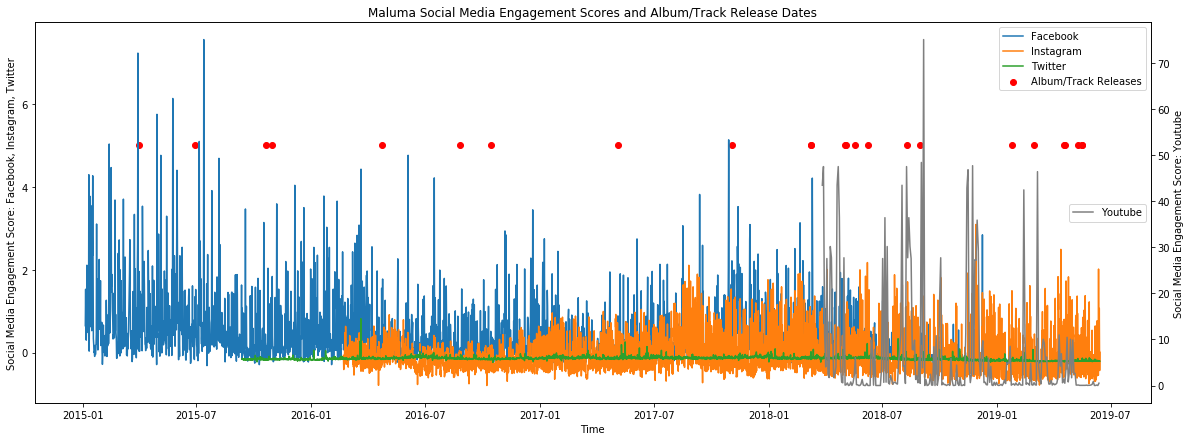

In [143]:
artist_social_chart('Maluma', '2015-01-01 00:00:00')

In [261]:
top_posts('Maluma', 'Facebook')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
51948,2014-05-10 16:46:00,NO AL MALTRATO ANIMAL,0.204336,17.32,0 days 00:00:10.000000000
51850,2014-04-08 14:37:00,En proceso.... Falta mucho pero ahí vamos! @yuliberthgc dimelo muchacho,0.161240,11.68,0 days 00:00:03.000000000
51837,2014-04-05 23:16:00,Relajación total para la noche que se acerca... Son 3 shows acá en Perú y En la madrugada para el aeropuerto... Próxima parada: BRASIL,0.102544,7.34,0 days 00:00:01.000000000
52581,2014-10-22 16:21:00,"Tu cuerpo llegara hasta donde tu mente pueda. No hay satisfacción mayor después de una buena rutina de ejercicios, tu mente y cuerpo te lo agradecerán. #CreeEnTi #PBDB2014",0.096855,12.38,0 days 20:52:43.000000000
51688,2014-03-04 12:06:00,"De regresos a mi ""Hogar"" gracias Barranquilla y Tumaco por tanto cariño!",0.089393,5.77,0 days 00:00:02.000000000
52074,2014-06-09 02:24:00,Lo Mio es cocinar ya vi.....!!,0.088377,7.83,0 days 05:24:36.000000000
52544,2014-10-03 03:23:00,..... Feliz noche! #pbdb #TeamMaluma,0.083498,9.95,0 days 09:22:29.000000000
52201,2014-07-05 05:14:00,Estamos listos MIAMI!,0.077624,7.44,0 days 00:00:11.000000000
51655,2014-02-26 19:29:00,Nadie dijo que estar enfermo era sinónimo de parar de trabajar...,0.075771,4.81,0 days 00:00:02.000000000
51675,2014-03-01 18:20:00,AQUÍ ESTAMOS!! #CarnavalDeBarranquilla,0.075443,4.83,0 days 00:00:01.000000000


In [262]:
top_posts('Maluma', 'Instagram')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
501488,2018-06-16 14:51:07,"Que gran experiencia hoy apoyando a ""La Azul Celeste"" 🇦🇷 mañana apoyamos a México 🇲🇽 y no veo la hora de ver a mi tricolor 💛💙❤️C O L O M B I A 🇨🇴 #LatinosUnidos",0.088275,3.37,0 days 12:57:02.000000000
501945,2019-01-14 17:16:45,Siempre andamos positivos ...✌🏻,0.074642,3.26,0 days 22:07:45.000000000
500904,2017-11-17 15:24:02,"#Repost @instagram (@get_repost)\n・・・\nIt wasn’t an easy decision for Colombian singer Juan Luis Londoño, better known as Maluma (@maluma), to give up soccer as a teenager in order to pursue music. But last night as he performed at the Latin Grammys (@latingrammys) in Las Vegas, where he was nominated for multiple awards, the choice felt increasingly right. “It is an honor,” says Maluma. “Having those multiple nominations makes me reflect on what a great year 2017 has been, and how far I’ve come.”\nFrom the dressing room to the stage, spend the evening at the Latin Grammys with Maluma — all on our Instagram story. 🎶",0.067416,2.28,0 days 10:23:31.000000000
499943,2017-02-01 16:51:20,Los únicos que aman sin juzgar ni pedir nada a cambio ❤/ They are the only ones that love without judgement or ask for anything in exchange.,0.065904,1.51,0 days 20:51:17.000000000
502148,2019-06-09 11:52:33,Fit 🥦 o fat 🍔? Por ahí dicen... “Donde hay carne hay fiesta” 😂,0.063751,3.24,1 days 18:10:40.000000000
500686,2017-09-17 14:50:10,"Gracias shak por tan grata visita! 🙏🏼que rápido pasa el tiempo, un año ya de #Chantaje 🔥",0.063688,2.06,0 days 21:45:11.000000000
500864,2017-11-03 20:24:46,Tú me partiste el corazón.. 💔 #corazon,0.063408,2.12,0 days 04:49:29.000000000
501446,2018-05-23 20:25:13,Comer - Rezar - Amar. / Eat - Pray - Love.,0.061763,2.57,0 days 11:22:14.000000000
500542,2017-08-01 13:17:42,Que manera de comenzar el día !! 💪🏻💪🏻💪🏻\n#CuerpoSanoMenteSana,0.061483,1.91,0 days 21:45:11.000000000
500532,2017-07-26 22:10:56,Antes de ÍDOLO.. grande PERSONA! @leomessi,0.061161,1.88,1 days 06:01:57.000000000


In [263]:
top_posts('Maluma', 'Twitter')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
913481,2015-11-20 05:30:09,GO GET IT NOWWWWW... @itunes @fifthharmony http://fb.me/4EqwkuIJM,0.009827,11.34,0 days 01:23:04.000000000
916239,2017-09-13 19:17:25,Qué hay de tu vida Beli?? Estas muy linda como siempre. Beso y abrazo se te quiere mucho mi reina!! @belindapop,0.005324,6.63,0 days 02:08:24.000000000
913477,2015-11-19 22:46:41,A solo horas de ser parte de la historia @latingrammys #SinContrato ft @fifthharmony http://fb.me/7w3PO2WWA,0.004773,5.51,0 days 01:44:09.000000000
914838,2016-08-08 02:26:47,BUENA VIBRA.. Sigue cosechando éxitos!! @laliespos @ TELEFE - Estudios Ronda https://www.instagram.com/p/BI1LZo4D84R/,0.004609,4.47,0 days 03:07:28.000000000
916081,2017-07-10 04:28:53,Feliz noche familia de Twitter 😴😘,0.004240,4.81,0 days 09:30:56.000000000
914819,2016-08-03 17:48:42,"Argentina, este domingo estaré en el programa de @SusanaGimenez por primera vez, No se lo pierdan. https://t.co/kCkLyKetAS",0.003982,4.38,1 days 09:31:12.000000000
914950,2016-08-28 21:43:05,Estoy en SHOCK.. Dios te tenga en su gloria ÍDOLO!! Descansa en paz Juan Gabriel!! 🙏🏻🌹 https://www.instagram.com/p/BJqvoILjkAP/,0.003556,3.29,0 days 05:51:23.000000000
916240,2017-09-13 21:14:00,Me hacen reír sus comentarios.. gracias por siempre alegrarme. Los amo!!,0.003355,4.18,0 days 01:56:35.000000000
914911,2016-08-21 22:31:58,Sin ustedes mi vida no sería la misma. ¿Ya vieron el filtro de Snapchat? #ComparteCocaColaCon https://t.co/2uR0e5mBk0,0.003260,3.65,0 days 00:25:13.000000000
915608,2017-02-28 17:58:24,"Gracias por sus mensajes, los leo. Poco tiempo libre por estos días pero sus palabras me motivan a seguir cada día creciendo. Abrazos!",0.003054,3.13,0 days 07:47:02.000000000


In [264]:
top_posts('Maluma', 'Youtube')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
983229,2018-03-27 11:34:11,Shakira - Chantaje (Official Video) ft. Maluma,115.671880,0,0 days 00:02:35.000000000
983274,2018-05-02 15:57:52,Ricky Martin - Vente Pa' Ca ft. Maluma (Official Music Video),74.579188,0,0 days 00:00:52.000000000
983230,2018-03-27 11:34:24,Ricky Martin - Vente Pa' Ca ft. Maluma (Official Music Video),74.579188,0,0 days 00:00:13.000000000
983216,2018-03-27 11:28:50,Maluma - Felices los 4 (Official Video),73.211261,0,0 days 00:00:14.000000000
983156,2018-03-27 10:49:35,Maluma - Felices los 4 (Official Video),73.211261,0,0 days 00:00:18.000000000
983270,2018-05-02 15:55:04,Maluma - Felices los 4 (Official Video),73.211261,0,0 days 00:00:16.000000000
983331,2018-05-18 05:37:48,Maluma - Felices los 4 (Official Video),73.211261,0,0 days 00:00:27.000000000
983143,2018-03-27 10:33:10,Maluma - Felices los 4 (Official Video),73.211261,0,0 days 00:00:22.000000000
983212,2018-03-27 11:23:01,Maluma - Corazón (Official Video) ft. Nego do Borel,66.970890,0,0 days 00:00:09.000000000
983155,2018-03-27 10:49:17,Maluma - Corazón (Official Video) ft. Nego do Borel,66.970890,0,0 days 00:00:39.000000000


##### Maluma Analysis

Need to translate to english...


C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


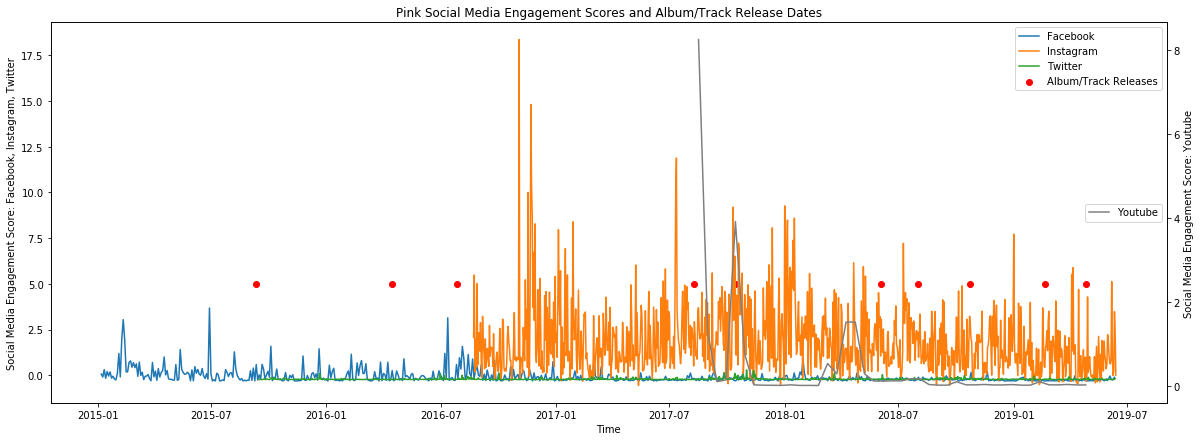

In [144]:
artist_social_chart('Pink', '2015-01-01 00:00:00')

In [284]:
top_posts('Pink', 'Facebook')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
245711,2015-11-15 19:50:00,The best kind of moments. <3 <3 <3,0.037173,61.1,1 days 02:30:00.000000000
245874,2016-11-14 17:11:00,Surprise!,0.032200,53.16,3 days 01:36:34.000000000
245652,2015-05-06 16:16:00,So cute!,0.031246,51.13,9 days 00:00:00.000000000
245651,2015-04-27 16:16:00,More than love.,0.021423,6.18,8 days 23:52:00.000000000
245653,2015-05-10 15:00:00,Happy Mother's Day!! <3<3<3,0.020968,34.34,3 days 22:44:01.000000000
245603,2014-06-15 18:00:00,Happy Father's Day to all the dads out there!,0.019936,5.17,6 days 22:59:59.000000000
245753,2016-04-07 19:45:00,Three generations of the same nose :),0.017708,29.03,2 days 22:28:13.000000000
245884,2017-01-03 18:10:00,Happy New Year 🎆 #newlove #newlife #newenergy #newhope #newday the Harts thank you for your love ❤️ and we send it back to you in spades.,0.017630,29.04,12 days 02:14:26.000000000
245786,2016-05-08 16:53:00,"I was born the day you were born. You, my love, my child, me, your Mama. We're doing pretty okay, aren't we love? Thank you for choosing me, my dear. Always. #HappyMothersDay",0.016413,26.41,0 days 18:45:19.000000000
245691,2015-10-01 14:30:00,Who remembers this P!nk performance during The GRAMMYs in 2010? #tbt!,0.016059,26.4,1 days 00:35:00.000000000


In [285]:
top_posts('Pink', 'Instagram')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
556795,2016-11-12 12:52:36,Surprise!,0.434830,1.67,1 days 01:10:05.000000000
556812,2016-12-28 17:31:33,Jameson Moon Hart 12.26.16,0.354299,1.82,6 days 19:21:34.000000000
557023,2017-08-28 20:39:46,💋,0.287724,2.68,0 days 23:54:38.000000000
556813,2016-12-28 17:46:34,I love my baby daddy 💙,0.255148,1.31,0 days 00:15:01.000000000
557022,2017-08-27 20:45:08,I mean.... 😍❤️😍 #vmas,0.249078,2.27,0 days 00:00:43.000000000
556808,2016-12-12 17:43:29,💫the snuggle is real 📷 :@deborahandersoncreative hair: @pamwiggy hands: willow sage,0.245095,1.17,0 days 15:56:15.000000000
557180,2018-01-28 18:16:26,Family Portrait #grammys,0.228383,3.28,0 days 04:06:35.000000000
557105,2017-10-31 00:53:08,And my all time favorite,0.226911,2.8,0 days 00:00:47.000000000
556814,2016-12-31 17:56:58,Happy New Year 🎆 #newlove #newlife #newenergy #newhope #newday the harts thank you for your love ❤️ and we send it back to you in spades.,0.215135,1.19,3 days 00:10:24.000000000
557194,2018-02-05 19:27:14,❤️💥,0.213214,3.26,0 days 22:58:46.000000000


In [286]:
top_posts('Pink', 'Twitter')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
790690,2018-01-29 23:35:43,https://t.co/BI861sjSZ4,0.004970,19.96,0 days 04:00:52.000000000
790701,2018-02-05 00:53:24,It was a throat lozenge,0.004578,11.32,0 days 00:02:34.000000000
790700,2018-02-05 00:50:50,"Yeah but altleast I suck while singing our countries national anthem, and you just suck by yourself on a dirty couch. #winning https://twitter.com/king_sullivan/status/960293039855034368",0.003999,38.22,0 days 05:22:31.000000000
790656,2017-11-21 05:36:12,"Waking up to see a newly created riff between myself and another incredible woman, Christina, who took on an incredible feat, who I support fully, makes me so sad. You all perpetuate keeping women apart b/c you're afraid of the power we have when we get together.",0.003477,9.49,0 days 00:03:07.000000000
790824,2018-05-16 09:15:11,"I am of the mindset that it’s a blessing to grow old. That if your face has lines around your eyes and mouth it means you’ve laughed a lot. I pray I look older in 10 years, cause that will mean I’m alive. 🤙🏼",0.003404,8.29,0 days 00:10:51.000000000
790672,2017-12-28 07:29:20,A really sweet Mama came up 2me tonight at the grocery store and told me some nice words about how she gets strength from my parenting cause I’m not afraid to fuck up in public. We cried together. It’s so hard. Y’all. I wish us mamas could give ourselves and each other a break.,0.003217,8.47,10 days 10:14:20.000000000
790312,2017-05-23 00:19:05,"My thoughts and prayers are with the people of Manchester, any one affected, @ArianaGrande and the entire crew. Heartbreaking",0.003160,8.38,3 days 22:41:20.000000000
790039,2016-03-09 02:35:17,https://t.co/NPRoOcF0y9,0.002991,10.96,0 days 00:30:40.000000000
790223,2016-11-12 17:53:43,Surprise! https://t.co/EMb1Id2ToC,0.002914,10.98,1 days 12:43:15.000000000
790684,2018-01-22 02:28:35,Ummm. I’m singing the national anthem and the EAGLES ARE PLAYING?!?!?! IS THIS FOR REAL?!?!?!THATS WHASSUP!!!!!!!! Shtjtkd widnamc ckamcnsnzncbx!!!!!!!!!!!!!!!! Wooohooooooooooooioooooooooooooooooooooooooiiiiiiooooooooooo,0.002735,7.12,4 days 21:31:58.000000000


In [287]:
top_posts('Pink', 'Youtube')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
986780,2017-08-16 10:54:12,P!nk - What About Us (Official Music Video),29.029236,0,1045 days 00:26:12.000000000
986784,2017-12-14 15:54:33,P!nk - Beautiful Trauma (Official Video),13.755436,0,62 days 04:37:42.000000000
986772,2012-09-19 13:04:12,P!nk - Try (The Truth About Love - Live From Los Angeles),7.106395,0,0 days 00:00:13.000000000
986797,2019-03-22 18:06:50,P!nk - Walk Me Home (Official Video),5.317742,0,1 days 04:11:58.000000000
986796,2019-03-21 13:54:52,P!nk - Walk Me Home (Official Video),5.317742,0,29 days 09:35:44.000000000
986781,2017-08-16 10:54:33,P!nk - What About Us (Lyric Video),4.440203,0,0 days 00:00:21.000000000
986785,2018-07-23 11:52:56,P!nk - Whatever You Want (Official Video),2.653910,0,220 days 19:58:23.000000000
986758,2012-09-12 17:51:14,P!nk - Try (Official Lyric Video),2.245644,0,NaN
986794,2018-07-25 09:49:48,P!nk - Secrets (Official Video),1.850367,0,1 days 21:54:52.000000000
986763,2012-09-13 18:31:03,P!nk - True Love (Official Lyric Video),1.566158,0,1 days 00:39:00.000000000


##### Pink Analysis

Posts are more about emotions / family.  Not about her music career.

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


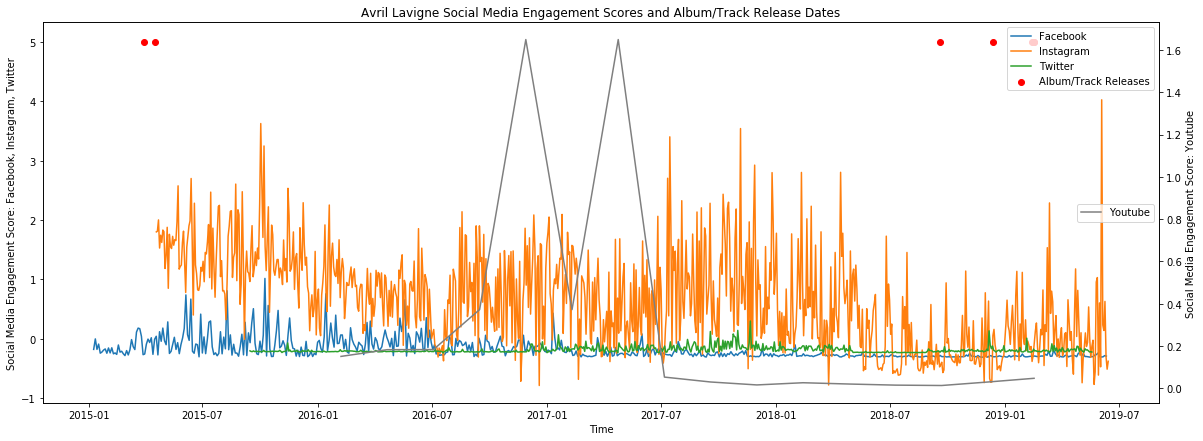

In [145]:
artist_social_chart('Avril Lavigne', '2015-01-01 00:00:00')

In [288]:
top_posts('Avril Lavigne', 'Facebook')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
141827,2015-10-08 22:55:00,🎤🎧🎧🎼🎶,0.012418,52.08,4 days 23:31:08.000000000
141804,2015-07-30 18:14:00,Mind body sun and water ☀️👙😎,0.010479,43.94,1 days 23:26:18.000000000
141704,2014-05-07 01:42:00,Backstage Twinzies with my Girl Demi Lovato...,0.010258,42.3,0 days 05:16:39.000000000
141864,2015-12-13 21:22:00,Happy 26th Birthday to the sweetest sweetheart Taylor Swift xoxoxo,0.010012,41.83,7 days 17:53:47.000000000
141779,2015-06-29 20:14:00,Husbands not allowed to talk !!! ( vocal rest ) Hahahah lol. Shhhh. Best day ever??!!??,0.009835,41.26,0 days 09:14:18.000000000
141782,2015-07-01 21:01:00,Bon Anniversaire Chad Nickelback 💎💎💎💎💎 #France #Castle,0.009178,38.51,1 days 16:55:58.000000000
141912,2016-04-22 18:03:00,💚🌴💚☀💚🌴💚☀💚🌴💚,0.009085,37.68,0 days 15:43:10.000000000
141829,2015-10-09 19:45:00,WERK 🎸🎶,0.008183,34.32,0 days 03:01:51.000000000
141820,2015-09-19 03:41:00,CHRISTMAS in September this year!!!🎄🎄🎄,0.007676,32.23,2 days 04:58:38.000000000
141835,2015-11-01 04:30:00,Happy Halloween from me and my girlies 🎃🎃🎃🎃🎃🎃🎃💛💛💛💛💛,0.007404,31.03,0 days 03:08:15.000000000


In [289]:
top_posts('Avril Lavigne', 'Instagram')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
314462,2019-05-25 20:16:07,15 years of Under My Skin. What was your favorite song off this album? 🖤,0.109540,4.9,2 days 05:09:38.000000000
313689,2015-08-30 02:17:33,"Such a Pleasure to perform ""Complicated"" tonight with @taylorswift on her #1989 world tour! She ROCKS 💙💙💙",0.100496,1.15,0 days 00:15:12.000000000
314130,2018-07-14 13:40:12,🇨🇦🎤🎸@shawnmendes great show last night 🎶🎹,0.098585,2.71,3 days 20:06:58.000000000
314065,2018-02-01 13:50:46,Enjoying being back East. NYC I love you ❤️ @guess #NYC #GUESS\n( 📷 by @ryancabrera ),0.095413,2.72,23 days 20:56:25.000000000
313692,2015-09-02 14:53:54,"It is with heavy heart that Chad and I announce our separation today. Through not only the marriage, but the music as well, we've created many unforgettable moments. We are still, and forever will be, the best of friends, and will always care deeply for each other. To all our family, friends and fans, thank you sincerely for the support.",0.091920,1.07,1 days 23:00:00.000000000
314143,2018-08-18 17:26:27,I can’t wait for September 🌈💖🎼✨⭐️🌟💫chilling this weekend and prepping for my video shoot this week ! Fuck yasssss,0.084592,4.35,4 days 03:46:54.000000000
314222,2018-10-18 18:16:19,💜@billboard,0.081845,4.42,1 days 06:14:13.000000000
314186,2018-09-19 21:28:02,Fighting #LymeDisease has been the hardest battle I’ve ever fought. And it’s not over yet. Writing the music that I shared with you today helped me heal. Join me and #TheAvrilLavigneFoundation as we fight #LymeDisease. #HeadAboveWater #FightLyme\nwww.TheAvrilLavigneFoundation.org\n・・・\n#Repost @theavrillavignefoundation\n・・・\nGet your #HeadAboveWater charitable t-shirt NOW to join our fight against #LymeDisease. All proceeds help provide individuals affected by Lyme with treatment they otherwise couldn’t afford. #FightLyme #LymeWarrior #HeadAboveWater,0.081790,4.29,0 days 03:25:33.000000000
314159,2018-09-10 13:37:33,#headabovewater,0.081723,4.26,0 days 00:00:40.000000000
314063,2017-12-25 13:12:40,Merry Christmas guys - can’t wait for 2018 to show you everything I’ve been working on!! ❤️🎄,0.079567,2.25,7 days 17:44:46.000000000


In [290]:
top_posts('Avril Lavigne', 'Twitter')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
690104,2018-09-18 17:18:25,https://t.co/ou3sd6zEEf,0.005032,5.41,0 days 09:03:33.000000000
690093,2018-09-13 20:35:04,https://t.co/51TRuitLLS,0.003556,5.48,0 days 21:43:02.000000000
690313,2019-02-11 21:16:59,“I am a fucking cherry bomb” #DumbBlonde ft. @NICKIMINAJ. Tomorrow 💕 https://t.co/6EHZbC7VeI,0.003483,5.06,0 days 20:49:53.000000000
690069,2018-07-14 20:45:56,🇨🇦🎤🎸@ShawnMendes great show last night 🎶🎹 https://t.co/tX5vKxJp6w,0.003387,3.69,1 days 05:07:01.000000000
690089,2018-09-01 17:44:45,https://t.co/uQ3GHq4OiJ,0.002993,3.26,8 days 20:49:25.000000000
689936,2017-02-20 22:07:02,Congrats to my little sister Michelle and Ryota on their marriage! Wishing you both all the love and happiness in the world! ❤ #family #love https://t.co/KbCUYkpqCf,0.002868,3.26,4 days 04:53:46.000000000
690090,2018-09-06 16:02:57,I wrote a letter to my fans on my website. http://AvrilLavigne.com https://t.co/xbmS0WifO1,0.002582,10.28,4 days 22:18:12.000000000
690091,2018-09-10 17:56:58,🌊⚓️ #headabovewater https://t.co/yWcvFDoQWc,0.002505,2.72,4 days 01:54:01.000000000
690346,2019-02-21 19:27:03,🌟 https://twitter.com/shanedawson/status/1097588926259245056,0.002328,16.8,0 days 19:24:02.000000000
690076,2018-07-28 20:09:52,🖤 https://t.co/ApnkoAUqOO,0.002327,2.53,3 days 00:51:57.000000000


In [291]:
top_posts('Avril Lavigne', 'Youtube')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
974543,2011-02-08 18:42:28,Avril Lavigne - What The Hell (Official Music Video),35.015628,0,222 days 04:04:43.000000000
974570,2011-05-20 12:33:42,Avril Lavigne - Smile (Official Music Video),21.474823,0,10 days 22:50:11.000000000
974584,2015-02-03 18:05:32,Avril Lavigne - Here's to Never Growing Up (Official Music Video),19.448118,0,0 days 00:00:42.000000000
974582,2015-02-03 18:04:27,Avril Lavigne - Hello Kitty (Official Music Video),18.657804,0,0 days 00:00:37.000000000
974581,2015-02-03 18:03:50,Avril Lavigne - Let Me Go ft. Chad Kroeger (Official Music Video),18.044216,0,1039 days 21:41:20.000000000
974583,2015-02-03 18:04:50,Avril Lavigne - Rock N Roll (Official Music Video),10.480461,0,0 days 00:00:23.000000000
974592,2019-02-12 14:29:02,Avril Lavigne - Head Above Water (Official Video),8.887380,0,0 days 00:00:10.000000000
974590,2019-02-12 14:24:02,Avril Lavigne - Head Above Water (Official Video),8.887380,0,0 days 00:00:12.000000000
974585,2015-03-03 18:47:05,Avril Lavigne - Give You What You Like (Official Music Video),4.100942,0,28 days 00:41:33.000000000
974588,2019-02-12 14:23:37,Avril Lavigne feat. Nicki Minaj - Dumb Blonde (Lyric Video),2.009680,0,62 days 01:11:09.000000000


##### Avril Lavigne Analysis

Posts are more focused on her music

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


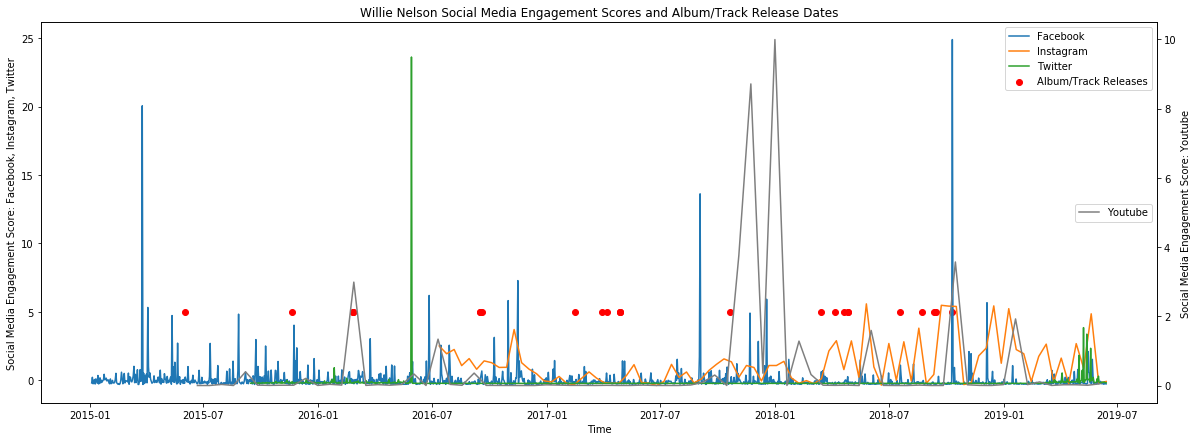

In [146]:
artist_social_chart('Willie Nelson', '2015-01-01 00:00:00')

In [293]:
top_posts('Willie Nelson', 'Facebook')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
133130,2018-04-09 16:15:00,"In case you missed it, check out Willie’s new song “Something You Get Through.” Pre-order ‘Last Man Standing’ today: https://WillieNelson.lnk.to/lmsFA!20",0.234626,333.42,3 days 00:08:16.000000000
131961,2015-04-20 21:20:00,"In case you missed it, here’s Willie and Merle Haggard’s video for “It’s All Going to Pot” off ‘Django and Jimmie.’",0.189580,212.35,0 days 05:03:08.000000000
131782,2014-08-18 14:07:00,Willie shows Bobbie a card trick.,0.148370,159.17,2 days 16:13:23.000000000
132766,2017-01-04 03:34:00,Thank you Snoop Dogg for the Christmas sweater.,0.129673,156.76,2 days 17:02:57.000000000
131502,2013-11-20 17:40:00,"We think this pup is a Willie fan, what do you think?",0.112700,29,0 days 02:09:39.000000000
131532,2013-12-11 13:00:00,Don't let your babies grow up to be cowboys or you're going to need a bigger tree!,0.100905,25.97,1 days 09:42:46.000000000
131560,2014-01-15 16:29:00,'Like' if it made you chuckle.,0.076516,20.81,0 days 17:23:27.000000000
132503,2016-04-29 19:53:00,What a great picture from Willie's birthday party!,0.070648,82.12,0 days 02:26:38.000000000
131791,2014-08-27 17:58:00,"Join us in wishing Willie's beautiful wife, Annie, a happy birthday!",0.064516,22.24,0 days 02:21:41.000000000
132375,2016-01-19 22:49:00,"Happy Birthday, Dolly Parton!",0.060538,67.28,3 days 03:54:17.000000000


In [294]:
top_posts('Willie Nelson', 'Instagram')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
667317,2017-04-30 18:06:43,Thank you for all of the birthday messages.,0.144680,5.78,9 days 01:57:42.000000000
667327,2018-03-26 22:52:12,Only Willie.,0.142317,7.72,3 days 12:07:10.000000000
667334,2018-08-12 09:32:24,Old friends,0.141311,9.05,73 days 16:39:38.000000000
667328,2018-04-12 16:48:18,Willie and Paul McCartney singing together a few days ago at a party that nearly everyone in the Northern and Southern Hemisphere wishes they could have attended. @paulmccartney,0.140959,7.77,16 days 17:56:06.000000000
667329,2018-04-14 21:47:46,Two Super Troopers inspect the bus before tonight's concert.,0.140406,7.75,2 days 04:59:28.000000000
667336,2018-10-26 19:28:55,JUST VOTE! goo.gl/CYB2uW,0.136706,9.15,4 days 12:44:56.000000000
667347,2019-04-29 13:56:49,Amazing to see Willie on the cover of the @rollingstone today! That's a great way to celebrate your 86th birthday! Check out the piece and pre-order his new album Ride Me Back Home,0.128178,9.71,2 days 21:30:19.000000000
667324,2017-09-23 09:46:29,NaN,0.104343,4.9,0 days 17:59:27.000000000
667270,2016-04-06 15:36:49,https://youtu.be/AbZ3VdYb90o,0.102079,2.03,4 days 21:55:23.000000000
667313,2017-03-05 08:06:13,@dwightyoakam was on the show at the Pompano Beach Amphitheater and dropped by the bus after his set.,0.083524,3.08,5 days 15:37:44.000000000


In [295]:
top_posts('Willie Nelson', 'Twitter')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
832169,2017-01-04 03:42:18,Thank you @SnoopDogg for the Christmas Sweater https://t.co/jzaw7pkQEe,0.222522,369.46,3 days 10:57:13.000000000
833205,2018-08-16 15:48:07,"Whether it was Gospel, Blues, Jazz, R&B, Pop,or Civil Rights, Aretha Franklin was the greatest gift and the voice of a generation. She could turn any song into a hymn. She will be greatly missed here on earth, but that band in heaven just got our Angel Rest In Peace Aretha",0.038018,66.83,1 days 00:23:36.000000000
833210,2018-09-30 05:18:57,https://t.co/c8WzoFYlhv,0.033568,44.59,36 days 13:33:04.000000000
833216,2019-02-15 05:02:49,Chris Hays and Beto say hello after the concert in El Paso. https://t.co/gXf1GLaiFi,0.023944,32.21,0 days 00:48:15.000000000
833198,2018-04-15 01:48:46,Two Super Troopers inspect the bus before tonight's concert. #SuperTroopers2 https://t.co/EpSPyzfDwt,0.019157,25.33,22 days 11:16:46.000000000
832050,2016-04-06 19:32:08,https://youtu.be/AbZ3VdYb90o https://t.co/wcvEZbCBFP,0.010687,31.66,8 days 04:34:47.000000000
833203,2018-08-13 15:03:11,Hundreds of families are still separated all over the country. I urge you to contribute to Grassroots Leadership's Deportation Defense and Bond Fund to make release and reunification possible for more families. Give now at http://bit.ly/HuttoFund.,0.008912,39.08,15 days 01:35:56.000000000
833172,2017-08-14 05:05:29,This is Willie I am sorry to have to cut the SLC show short tonight The altitude got to me I am feeling better now & headed for lower ground,0.007122,12.38,16 days 06:38:41.000000000
833228,2019-04-29 16:34:34,Amazing to see Willie on the cover of the @RollingStone today! That’s a great way to celebrate your 86th birthday! Check out the piece https://WillieNelson.lnk.to/rollingstoneTA https://t.co/8up7FDENJZ,0.004903,22.41,3 days 02:33:40.000000000
833220,2019-02-21 14:47:26,Willie and Mr Mister (head of road security) will take a well deserved break for a few days. See you in Florida on March 1st. https://t.co/WgTwF89XRC,0.004072,5.49,0 days 10:58:24.000000000


In [296]:
top_posts('Willie Nelson', 'Youtube')

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
991961,2019-04-26 11:55:14,Willie Nelson - Always On My Mind (Official Music Video),145.037725,0,0 days 00:02:00.000000000
991693,2011-06-06 10:46:33,Willie Nelson - Always On My Mind (Official Music Video),145.037725,0,0 days 00:00:17.000000000
991687,2011-06-05 12:30:15,Willie Nelson - Always On My Mind (Official Music Video),145.037725,0,0 days 00:00:04.000000000
991688,2011-06-05 12:30:20,Willie Nelson - Seven Spanish Angels (Video),126.457749,0,0 days 00:00:05.000000000
991959,2019-04-26 11:51:20,Willie Nelson - Seven Spanish Angels (Video),126.457749,0,0 days 00:02:17.000000000
991958,2019-04-26 11:49:03,The Highwaymen - Highwayman,54.426638,0,0 days 00:01:46.000000000
991976,2019-04-26 12:38:17,Toby Keith - Beer For My Horses ft. Willie Nelson,51.788200,0,0 days 00:00:36.000000000
991699,2011-06-06 10:52:00,"Willie Nelson and Shania Twain, Blue eyes crying in the rain",47.165707,0,0 days 00:02:06.000000000
991643,2010-06-03 17:58:24,"Willie Nelson and Shania Twain, Blue eyes crying in the rain",47.165707,0,0 days 00:01:40.000000000
991877,2013-05-08 14:02:20,Willie Nelson - Blue Eyes Crying In The Rain,44.848069,0,0 days 00:02:58.000000000


##### Willie Nelson Analysis

Mix of music focus and family / friend focus